In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

### Loading Data

In [85]:
df = pd.read_csv('/kaggle/input/stocks/all_stocks_1yr.csv')


In [86]:
df

,Date,Open,High,Low,Close,Volume,Name
0,2016-08-12,181.47,181.47,179.90,180.27,1232856,MMM
1,2016-08-15,181.00,181.39,180.46,180.56,1268247,MMM
2,2016-08-16,180.12,180.33,179.21,179.25,1363554,MMM
3,2016-08-17,178.67,180.09,178.32,179.87,1358528,MMM
4,2016-08-18,179.70,179.70,178.58,179.18,1088677,MMM
...,...,...,...,...,...,...,...
126212,2017-08-07,62.12,62.34,61.25,61.83,4208287,ZTS
126213,2017-08-08,60.49,61.00,59.50,60.00,4663668,ZTS
126214,2017-08-09,59.95,60.87,59.76,60.81,4017297,ZTS
126215,2017-08-10,60.87,61.37,59.71,59.74,2690725,ZTS


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126217 entries, 0 to 126216
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    126217 non-null  object 
 1   Open    125837 non-null  float64
 2   High    126011 non-null  float64
 3   Low     125993 non-null  float64
 4   Close   126217 non-null  float64
 5   Volume  126217 non-null  int64  
 6   Name    126217 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 6.7+ MB


In [88]:
data = df[['Open', 'Close']]

In [89]:
scaler = MinMaxScaler()
data.loc[:, 'Open'] = scaler.fit_transform(data['Open'].values.reshape(-1, 1))


In [90]:
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [91]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data.iloc[i+sequence_length]['Open'])
    return np.array(X), np.array(y)

In [92]:
sequence_length = 15


In [93]:
X_train, y_train = create_sequences(train_data[['Open']], sequence_length)
X_test, y_test = create_sequences(test_data[['Open']], sequence_length)


In [94]:
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [95]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
1578/1578 [==============================] - 22s 12ms/step - loss: nan
Epoch 2/50
1578/1578 [==============================] - 20s 12ms/step - loss: nan
Epoch 3/50
1578/1578 [==============================] - 19s 12ms/step - loss: nan
Epoch 4/50
1578/1578 [==============================] - 19s 12ms/step - loss: nan
Epoch 5/50
1578/1578 [==============================] - 19s 12ms/step - loss: nan
Epoch 6/50
1578/1578 [==============================] - 19s 12ms/step - loss: nan
Epoch 7/50
1578/1578 [==============================] - 18s 11ms/step - loss: nan
Epoch 8/50
1578/1578 [==============================] - 17s 11ms/step - loss: nan
Epoch 9/50
1578/1578 [==============================] - 17s 11ms/step - loss: nan
Epoch 10/50
1578/1578 [==============================] - 17s 11ms/step - loss: nan
Epoch 11/50
1578/1578 [==============================] - 17s 11ms/step - loss: nan
Epoch 12/50
1578/1578 [==============================] - 17s 11ms/step - loss: nan
Epoch 13/50
1

In [96]:
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

789/789 [==============================] - 3s 4ms/step - loss: nan
Train Loss: nan, Test Loss: nan


## Data Predictions

In [97]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


789/789 [==============================] - 3s 4ms/step


In [98]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

#### *Plot the predictions*

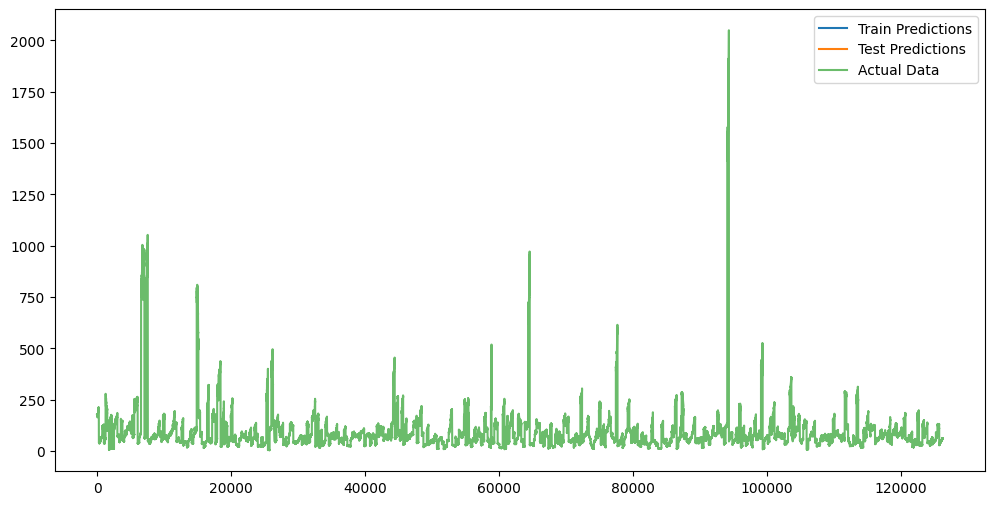

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[:len(train_predictions)], train_predictions, label='Train Predictions')
test_indices = range(len(train_predictions) + sequence_length - 1, len(train_predictions) + sequence_length - 1 + len(test_predictions))
plt.plot(data.index[test_indices], test_predictions, label='Test Predictions')
plt.plot(data.index, data['Close'], label='Actual Data', alpha=0.7)
plt.legend()
plt.show()


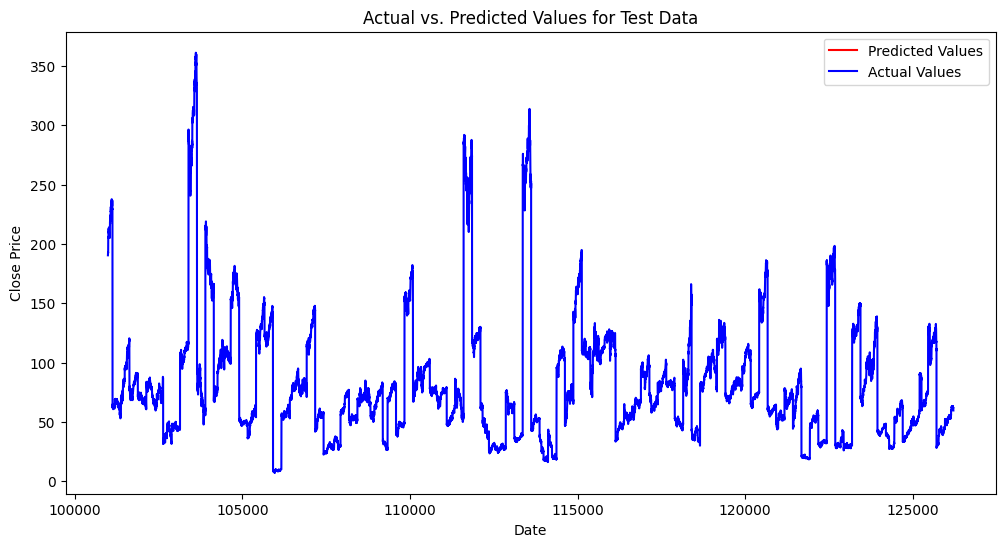

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(test_predictions):], test_predictions, label='Predicted Values', color='red')
plt.plot(data.index[-len(test_predictions):], data['Close'].tail(len(test_predictions)), label='Actual Values', color='blue')
plt.title('Actual vs. Predicted Values for Test Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
